# Functions That we use frequently

importing libraries we are going to need :

In [64]:
import skimage.io as iio
import numpy as np
import matplotlib.pyplot as plt

### Image Reading

In [65]:
im=iio.imread('cat_grayscale.jpg',as_gray=True)
print(im.shape)

(500, 750)


### Image Display

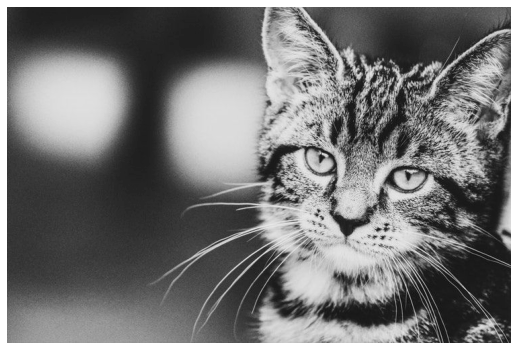

In [76]:
def make_image(data, size=(7, 7), dpi=100):
    fig = plt.figure()
    fig.set_size_inches(size)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.set_cmap('gray')
    ax.imshow(data, aspect='equal')
make_image(im)

## Image saving

### Rectangular mask creating function

In [77]:
def mask(im, x1, x2 , y1 , y2):
    shape= im.shape
    new = np.ones((shape[0],shape[1]), dtype=int)
    for i in range(y1,y2):
        for j in range(x1,x2):
            new[i,j]=0
    return new

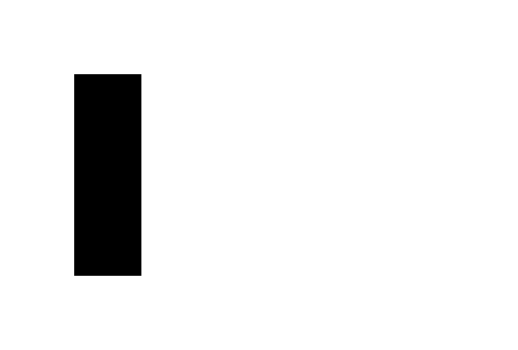

In [78]:
make_image(mask(im, 100, 200 , 100 , 400))

In [79]:
def delete_zone(im,mask):
    return im*mask

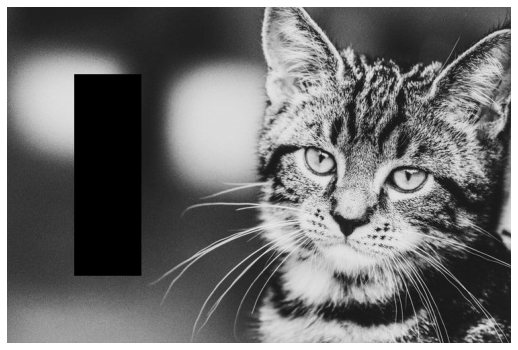

In [80]:
make_image(delete_zone(im,mask(im, 100, 200 , 100 , 400)))

# Let's calculate the priority term

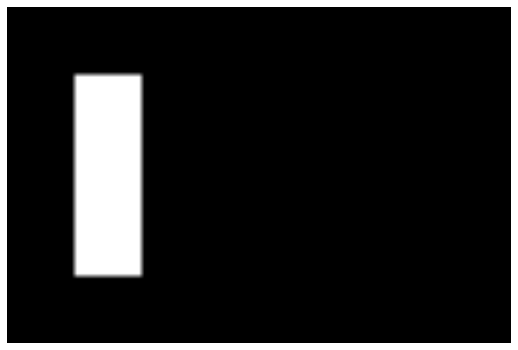

In [88]:
# Let's calculate the priority term : 

## C(p) the confidence term :

## First lets define a function that would allow us to get patches
def get_patch(image,p,patch_size=8):
    r=int(patch_size/2)
    clip = image[p[0]-r:p[0]+r, p[1]-r:p[1]+r]
    return clip    

def patch_norm(p):
    return sum([sum([abs(p[i,j]) for i in range(p.shape[0])]) for j in range(p.shape[1])])

def init_c(mask):
    return np.ones(mask.shape)-mask


######## Confidence term
def c_matrix(mask):
    i = init_c(mask)
    n,m= mask.shape
    c=np.zeros(mask.shape)
    for k in range(0,n):
        for l in range(0,m):
            patch = get_patch(i,(k,l))
            c[k,l]=np.sum(patch)
    return c/(patch.shape[0]*patch.shape[1])

make_image(c_matrix(mask(im, 100, 200 , 100 , 400)))